# Store music metadata using apple shortcuts
In this small project I was trying to store the metadata about the music that gets shazamed on my macOS
I started by trying to find Shazam database file on my system but that proved to be quit tricky
Note that I tried this on MacOs, it might be different in iOS device
TODO: test on mobile device

## Create a Shotcut
the the shortcut app, click on the plus sign, a new shortcut will be creted
<img src="imgs/shazam_create.png" alt="create a new shortcut" width="70%" style="margin:5px;"/>

Now the important part, I don't think I will be successful in explaining this without a video, I recorded one and put it on you tube, https://youtu.be/EvFkGQIeeOk

below is an attempt to make it work in this notebook, I am not sure if that will work reliably

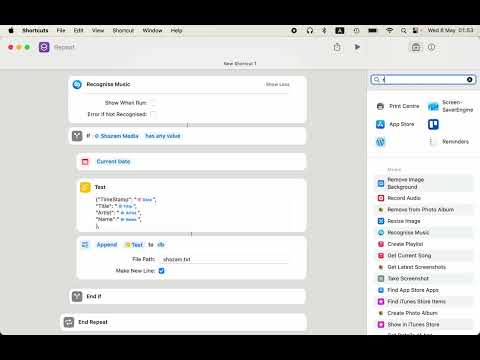

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EvFkGQIeeOk',autoplay=1, height=600, width=600)

By the end of the above video a text file was generated  and stored at "db/shazam.txt", given that you had some music playing on your system. 

<img src="imgs/shazam.png" alt="shows the text file created by the shotcut app" width="80%" style="margin:5px;"/>



Notice that a song was logged twice, this is because we set the wait element to 120 sec but the song is longer than that just go and change it in the shortcut or wait until you load the data to modify it as you wish.

This works even when you have your headphones on, given that you have the [Greatdy Computer Audio](http://www.greatdy.com/mac-os-x/screen-record-studio) which is the equivalent of the windows stereo mix. 


PLEASE NOTE: I am in no way encouraging to download Greatdy, I use it myself but I can't guarantee its fully OK to use


also note that in the video I stored only title, Artist and Name to keep the video short, here is the actual one I am using on my machine

<img src="imgs/shortcut.png" alt="shows the text file created by the shotcut app" width="80%" style="margin:5px;"/>



## read the data

In [2]:
import re
import pandas as pd

In [10]:
fn = 'shazam.txt'
def get_data(fn):
    with open(fn, "r") as f:
        data = f.read()
    rows = re.findall(r"\{.*?\}", data, re.MULTILINE | re.DOTALL)
    lst= []
    for r in rows:
        keys = re.findall(r"\n\"([A-Za-z ]+?)\"\:", r, re.DOTALL | re.MULTILINE)
        dct = {}
        for k in keys:
            dct[k] = re.findall(rf'"{k}"\: \"(.*?)\",?', r, re.MULTILINE | re.DOTALL)[0]
        lst.append(dct)
    return pd.DataFrame(lst)
df =  get_data(fn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TimeStamp             3 non-null      object
 1   Title                 3 non-null      object
 2   Artist                3 non-null      object
 3   Lyrics Snippets       3 non-null      object
 4   Lyric Snippet Synced  3 non-null      object
 5   Artwork               3 non-null      object
 6   Video URL             3 non-null      object
 7   Shazem URL            3 non-null      object
 8   Apple Music URL       3 non-null      object
 9   Name                  3 non-null      object
dtypes: object(10)
memory usage: 372.0+ bytes


<ol>
  <li>
    <p><strong>Read File and Extract Data</strong>:</p>
    <pre>
with open(fn, "r") as f:
    data = f.read()
    </pre>
    <ul>
      <li>
        This code opens the file specified by <code>fn</code> in read mode
        (<code>"r"</code>) and reads its contents into the variable
        <code>data</code>.
      </li>
    </ul>
  </li>
  <li>
    <p><strong>Extract Rows</strong>:</p>
    <pre>
rows = re.findall(r"\{.*?\}", data, re.MULTILINE | re.DOTALL)
    </pre>
    <ul>
      <li>
        Using regular expressions (<code>re</code>), this line searches for all
        substrings within <code>data</code> that start with <code>{</code> and
        end with <code>}</code>, capturing everything in between. These
        substrings represent individual rows of data.
      </li>
    </ul>
  </li>
  <li>
    <p><strong>Extract Keys and Values</strong>:</p>
    <pre>
lst= []
for r in rows:
    keys = re.findall(r"\n\"([A-Za-z ]+?)\"\:", r, re.DOTALL | re.MULTILINE)
    dct = {}
    for k in keys:
        dct[k] = re.findall(rf'"{k}"\: \"(.*?)\",?', r, re.MULTILINE | re.DOTALL)[0]
    lst.append(dct)
    </pre>
    <ul>
      <li>
        For each row (<code>r</code>) extracted in the previous step, this code
        extracts keys and values from the row. It uses regular expressions to
        find all key-value pairs within each row.
      </li>
      <li>
        The outer loop iterates over each row, while the inner loop iterates
        over each key found in the row. For each key, it extracts its
        corresponding value using another regular expression.
      </li>
      <li>
        It then constructs a dictionary <code>dct</code> where the keys are the
        extracted keys and the values are the corresponding values.
      </li>
      <li>Finally, it appends this dictionary to a list <code>lst</code>.</li>
    </ul>
  </li>
  <li>
    <p><strong>Create DataFrame</strong>:</p>
    <pre>
return pd.DataFrame(lst)
    </pre>
    <ul>
      <li>
        This line converts the list of dictionaries (<code>lst</code>) into a
        pandas DataFrame using <code>pd.DataFrame()</code>. Each dictionary in
        the list represents a row of data, and pandas constructs a DataFrame
        where each key becomes a column.
      </li>
    </ul>
  </li>
  <li>
    <p>
      <strong>Call <code>get_data</code> Function and Display DataFrame</strong>
    </p>
    <pre>
df = get_data(fn)
df.head()
    </pre>
    <ul>
      <li>
        This code calls the <code>get_data</code> function with the filename
        <code>fn</code> and assigns the returned DataFrame to the variable
        <code>df</code>.
      </li>
      <li>
        It then uses <code>df.head()</code> to display the first few rows of the
        DataFrame.
      </li>
    </ul>
  </li>
</ol>
<p>
  In summary, this code reads data from a file, extracts rows of data using
  regular expressions, parses each row to extract keys and values, and then
  constructs a pandas DataFrame from the extracted data.
</p>


In [ ]:
df.info()

In [ ]:
#remove duplicates
subset = ['Artist', 'Title', 'Name']
print(subset)
df.drop_duplicates(subset=subset,inplace=True)
df.info()

looks like 2 minutes is too low

In [ ]:
first_row = df.iloc[0]
first_row

In [ ]:
# !pip install lyricgenius
import lyricsgenius
# Initialize Genius API client
genius = lyricsgenius.Genius("YOUR_ACCESS_TOKEN")

# Search for a song
song = genius.search_song(first_row['Title'], first_row["Artist"])

# Print the lyrics
print(song.lyrics)

In [ ]:
import requests
import re
import pandas as pd
fn = 'https://raw.githubusercontent.com/sophie-greene/shazam/main/shazam.txt'
def get_data(fn):
    data = requests.get(fn).text
    rows = re.findall(r"\{.*?\}", data, re.MULTILINE | re.DOTALL)
    lst= []
    for r in rows:
        keys = re.findall(r"\n\"([A-Za-z ]+?)\"\:", r, re.DOTALL | re.MULTILINE)
        dct = {}
        for k in keys:
            dct[k] = re.findall(rf'"{k}"\: \"(.*?)\",?', r, re.MULTILINE | re.DOTALL)[0]
        lst.append(dct)
    return pd.DataFrame(lst)
df =  get_data(fn)
df.info()

In [ ]:
df.tail()